# Recognizing Handwritten Digits on MNIST Dataset using KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data Preparation

df = pd.read_csv('dataset/train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
print(df.shape)

(42000, 785)


In [10]:
x = data[:,1:]
y = data[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [52]:
split = int(0.8*x.shape[0])
print(split)

33600


In [53]:
X_train = x[:split,:]
X_test = x[split:,:]
Y_train = y[:split]
Y_test = y[split:]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


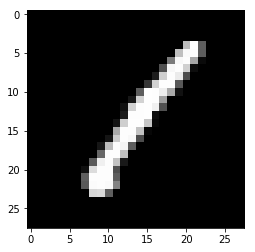

1


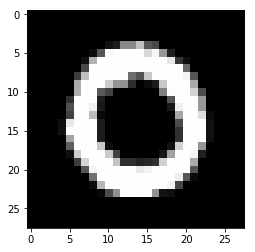

0


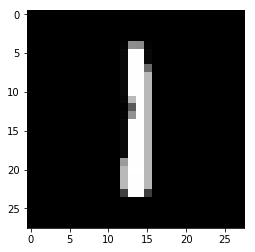

1


In [54]:
def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()
for i in range(3):
    drawImage(X_train[i])
    print(Y_train[i])

In [96]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,query_point,k=5):
    distance_array = []
    for i in range(x.shape[0]):
        dist = distance(x[i],query_point)
        distance_array.append((dist,y[i]))
    distance_array = sorted(distance_array)
    distance_array = np.array(distance_array)
    distance_array = distance_array[:k]
    print(distance_array)
    unique_vals = np.unique(distance_array[:,1],return_counts=True)
    print(unique_vals)
    max_freq_index = unique_vals[1].argmax()
    print(max_freq_index)
    return unique_vals[0][max_freq_index]

In [97]:
prediction = knn(X_train,Y_train,X_test[8])
print("Predicted number is ",int(prediction))

[[1603.14784097    8.        ]
 [1640.90523797    8.        ]
 [1704.42688315    0.        ]
 [1726.45416968    5.        ]
 [1728.68389245    5.        ]]
(array([0., 5., 8.]), array([1, 2, 2], dtype=int64))
1
Predicted number is  5


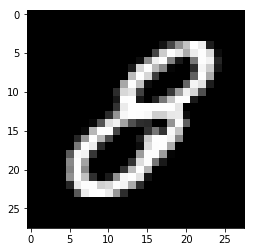

8


In [98]:
drawImage(X_test[8])
print(Y_test[8])

## Accuracy of KNN over Test Set

In [88]:
Y_pred = []
print("Starting algorithm")
for i in range(X_test.shape[0]):
    prediction = knn(X_train,Y_train,X_test[i])
    Y_pred.append(int(prediction))
    print("Prediction is ",prediction)
print("Algorithm finished Executing")

In [63]:
y_test_init = Y_test[:100]
acc = ((Y_pred==y_test_init).sum())/100
print(acc)

0.96
